In [37]:

import pandas as pd
# df = pd.read_sql('SELECT * FROM crypt', con=engine)
# df.to_csv("data.csv")
from datetime import datetime
import datetime
df = pd.read_csv("data.csv",index_col=0)
start = df.iloc[0]["time"]
end = df.iloc[-1]["time"]


In [38]:

def read_delta(name,delta):
    global start,end
    alice = df[df["name"] == name]
    if alice.empty:
        print("empty",name)
        return
    # start = alice.iloc[0]["time"]
    # end = alice.iloc[-1]["time"]
    import re
    start = re.sub(":\d\d$", ":00", start)
    bins = pd.date_range(start, end, freq=f'{delta}Min')
    dti = pd.DatetimeIndex([bins[-1] + datetime.timedelta(minutes=delta)])
    bins = bins.append(dti)
    xx = pd.to_datetime(alice.time)
    result = pd.cut(xx, bins=bins, labels=bins[:-1])
    alice["bins"] = result
    alice = alice.groupby(["bins"]).max()
    return alice

In [39]:

def contruct_data(n):
    result = None
    columns = ["time"]
    for crypt in ["ALICE", "CHR", "ATOM", "AXS", "TLM", "DOGE", "XRP", "ETH", "EOS", "BCH", "LTC", "MATIC", "AAVE",
                  "DOT", "LINK"]:
        data = read_delta("BINANCE:" + crypt + "USDT", n)
        if data is None:
            continue
        data.reset_index(inplace=True)
        item = data.loc[:, ["bins", "price"]]
        if result is None:
            result = item
            columns.append(crypt)
        else:
            # item.rename(columns={"price":"crypt"})
            try:
                result = pd.merge(result, item, on="bins")
                print(result.shape)
                columns.append(crypt)
            except Exception as e:
                print(f"error {crypt}", repr(e))
                print(item.shape)
    result.columns = columns
    result.fillna(method='bfill', inplace=True)
    return result

In [40]:
result = contruct_data(1)

d:\envs\crypt\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


(1107, 3)
(1107, 4)
(1107, 5)
(1107, 6)
(1107, 7)
(1107, 8)
(1107, 9)
(1107, 10)
(1107, 11)
(1107, 12)
(1107, 13)
(1107, 14)
(1107, 15)
(1107, 16)


In [128]:
result

,time,ALICE,CHR,ATOM,AXS,TLM,DOGE,XRP,ETH,EOS,BCH,LTC,MATIC,AAVE,DOT,LINK
0,2021-08-28 21:42:00,22.67,0.4237,19.98,78.06,0.3474,0.2877,1.1496,3229.18,4.989,633.5,173.5,1.466,367.8,26.09,25.83
1,2021-08-28 21:43:00,22.69,0.4245,19.98,78.18,0.3481,0.2878,1.1501,3229.88,4.991,634.0,173.5,1.466,368.0,26.09,25.85
2,2021-08-28 21:44:00,22.75,0.4241,19.97,78.18,0.3482,0.2878,1.1502,3229.86,4.987,633.7,173.5,1.466,368.0,26.08,25.84
3,2021-08-28 21:45:00,22.75,0.4229,19.96,78.57,0.3488,0.2879,1.1507,3230.21,4.992,633.6,173.4,1.467,368.1,26.10,25.86
4,2021-08-28 21:46:00,22.76,0.4221,19.97,78.88,0.3488,0.2879,1.1505,3230.88,4.988,634.0,173.2,1.467,368.3,26.11,25.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,2021-08-29 16:04:00,20.79,0.4670,21.75,73.43,0.3365,0.2821,1.1444,3207.24,5.092,677.2,179.2,1.433,362.7,25.90,25.81
1103,2021-08-29 16:05:00,20.85,0.4678,21.76,73.50,0.3377,0.2827,1.1441,3214.35,5.096,677.7,179.4,1.435,363.3,25.95,25.86
1104,2021-08-29 16:06:00,20.83,0.4672,21.90,73.50,0.3375,0.2827,1.1449,3216.52,5.097,677.9,179.5,1.436,363.8,25.95,25.87
1105,2021-08-29 16:07:00,20.88,0.4673,21.95,73.48,0.3387,0.2832,1.1457,3217.57,5.100,678.7,179.6,1.436,364.2,25.95,25.89


In [42]:
import matplotlib.pyplot as plt


In [101]:
# data = result.drop(["time"],axis=1)


In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scale = StandardScaler()
t = scale.fit_transform(data)


<AxesSubplot:>

<Figure size 1152x648 with 0 Axes>

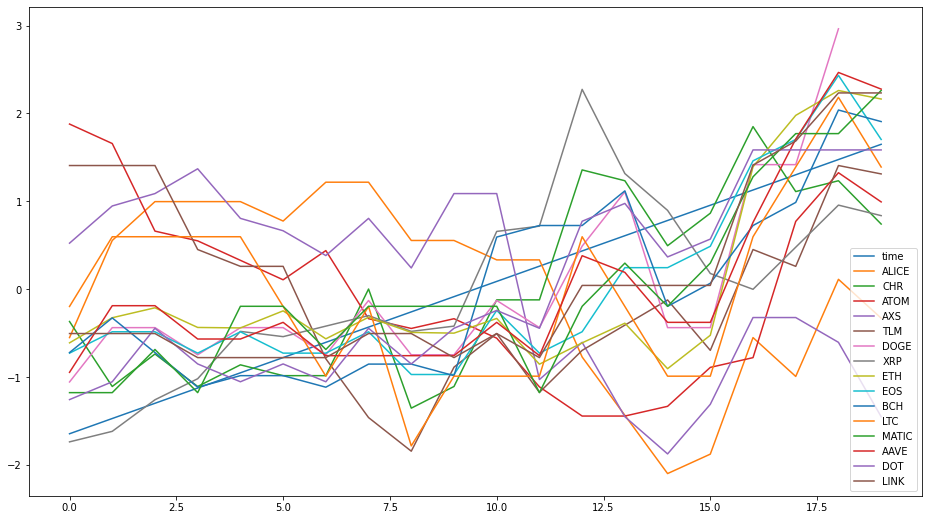

In [84]:
plt.figure(figsize=(16,9))
tdata = pd.DataFrame(data=t,columns=data.columns)
tdata.plot(figsize=(16,9))

In [124]:

def plot(cs):
    plt.figure(figsize=(16,9))
    for C in cs:
        plt.scatter(x,tdata[C],label=C)
        plt.plot(x,tdata[C])
#     plt.hlines(y=0,xmin=x[0],xmax=x[-1])
    plt.legend()
    plt.show()


In [125]:
x

1087   2021-08-29 15:49:00
1088   2021-08-29 15:50:00
1089   2021-08-29 15:51:00
1090   2021-08-29 15:52:00
1091   2021-08-29 15:53:00
1092   2021-08-29 15:54:00
1093   2021-08-29 15:55:00
1094   2021-08-29 15:56:00
1095   2021-08-29 15:57:00
1096   2021-08-29 15:58:00
1097   2021-08-29 15:59:00
1098   2021-08-29 16:00:00
1099   2021-08-29 16:01:00
1100   2021-08-29 16:02:00
1101   2021-08-29 16:03:00
1102   2021-08-29 16:04:00
1103   2021-08-29 16:05:00
1104   2021-08-29 16:06:00
1105   2021-08-29 16:07:00
1106   2021-08-29 16:08:00
Name: time, dtype: category
Categories (1107, datetime64[ns]): [2021-08-28 21:42:00 < 2021-08-28 21:43:00 < 2021-08-28 21:44:00 < 2021-08-28 21:45:00 ... 2021-08-29 16:05:00 < 2021-08-29 16:06:00 < 2021-08-29 16:07:00 < 2021-08-29 16:08:00]

In [114]:
tdata

,time,ALICE,CHR,ATOM,AXS,TLM,DOGE,XRP,ETH,EOS,BCH,LTC,MATIC,AAVE,DOT,LINK
0,-1.647509,-0.552832,-3.698353e-01,1.878152,0.522164,1.406007,-1.058065,-1.739966,-0.612756,-0.729756,-0.723121,-0.198419,-1.179536,-0.948304,-1.258770,-0.506754
1,-1.474087,0.552832,-1.109506e+00,1.656541,0.945540,1.406007,-0.439504,-1.620174,-0.326812,-0.486504,-0.328691,0.595257,-1.179536,-0.189661,-1.055742,-0.506754
2,-1.300665,0.995098,-7.396705e-01,0.659292,1.086665,1.406007,-0.439504,-1.260801,-0.213514,-0.486504,-0.723121,0.595257,-0.688062,-0.189661,-0.446660,-0.506754
3,-1.127243,0.995098,-1.109506e+00,0.548487,1.368915,0.449540,-0.748785,-1.021219,-0.437413,-0.729756,-1.117551,0.595257,-1.179536,-0.568982,-0.852715,-0.780675
4,-0.953821,0.995098,-8.629489e-01,0.326876,0.804414,0.258246,-0.439504,-0.482159,-0.442808,-0.486504,-0.986074,0.595257,-0.196589,-0.568982,-1.055742,-0.780675
5,-0.780399,0.773965,-9.862273e-01,0.105265,0.663289,0.258246,-0.439504,-0.542055,-0.248582,-0.729756,-0.986074,-0.198419,-0.196589,-0.379322,-0.852715,-0.780675
6,-0.606977,1.216231,-9.862273e-01,0.437682,0.381038,-0.793868,-0.748785,-0.422264,-0.566897,-0.729756,-1.117551,-0.992095,-0.688062,-0.758643,-1.055742,-0.780675
7,-0.433555,1.216231,-6.843327e-14,-0.337957,0.804414,-1.463395,-0.130223,-0.302472,-0.321417,-0.486504,-0.854598,-0.198419,-0.196589,-0.758643,-0.446660,-0.506754
8,-0.260133,0.552832,-1.356063e+00,-0.448762,0.239913,-1.845982,-0.748785,-0.482159,-0.494062,-0.973009,-0.854598,-1.785771,-0.196589,-0.758643,-0.852715,-0.506754
9,-0.086711,0.552832,-1.109506e+00,-0.337957,1.086665,-0.889514,-0.748785,-0.422264,-0.502155,-0.973009,-0.986074,-0.992095,-0.196589,-0.758643,-0.446660,-0.780675


In [ ]:
def mulsimilar():
    

def similarity(df,name):
    df.apply()

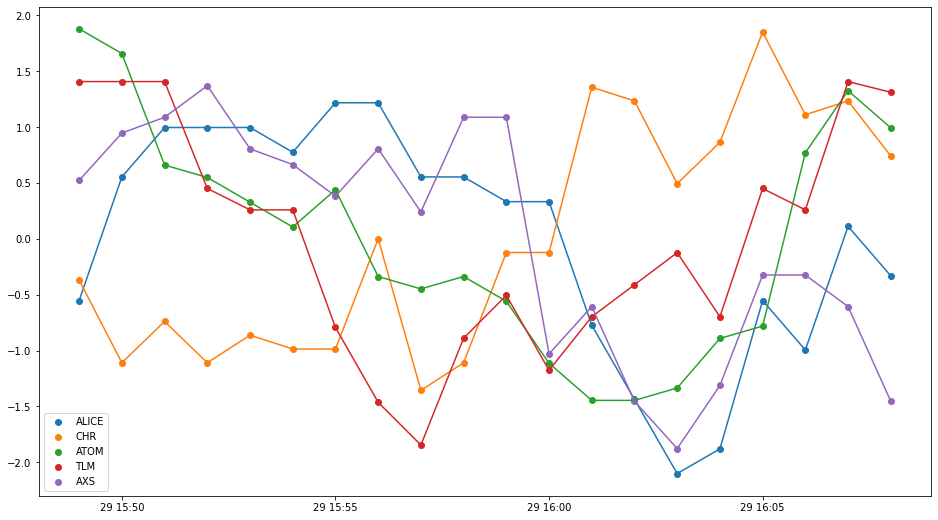

In [126]:
plot(["ALICE","CHR","ATOM","TLM","AXS"])

In [127]:
tdata

,time,ALICE,CHR,ATOM,AXS,TLM,DOGE,XRP,ETH,EOS,BCH,LTC,MATIC,AAVE,DOT,LINK
0,-1.647509,-0.552832,-3.698353e-01,1.878152,0.522164,1.406007,-1.058065,-1.739966,-0.612756,-0.729756,-0.723121,-0.198419,-1.179536,-0.948304,-1.258770,-0.506754
1,-1.474087,0.552832,-1.109506e+00,1.656541,0.945540,1.406007,-0.439504,-1.620174,-0.326812,-0.486504,-0.328691,0.595257,-1.179536,-0.189661,-1.055742,-0.506754
2,-1.300665,0.995098,-7.396705e-01,0.659292,1.086665,1.406007,-0.439504,-1.260801,-0.213514,-0.486504,-0.723121,0.595257,-0.688062,-0.189661,-0.446660,-0.506754
3,-1.127243,0.995098,-1.109506e+00,0.548487,1.368915,0.449540,-0.748785,-1.021219,-0.437413,-0.729756,-1.117551,0.595257,-1.179536,-0.568982,-0.852715,-0.780675
4,-0.953821,0.995098,-8.629489e-01,0.326876,0.804414,0.258246,-0.439504,-0.482159,-0.442808,-0.486504,-0.986074,0.595257,-0.196589,-0.568982,-1.055742,-0.780675
5,-0.780399,0.773965,-9.862273e-01,0.105265,0.663289,0.258246,-0.439504,-0.542055,-0.248582,-0.729756,-0.986074,-0.198419,-0.196589,-0.379322,-0.852715,-0.780675
6,-0.606977,1.216231,-9.862273e-01,0.437682,0.381038,-0.793868,-0.748785,-0.422264,-0.566897,-0.729756,-1.117551,-0.992095,-0.688062,-0.758643,-1.055742,-0.780675
7,-0.433555,1.216231,-6.843327e-14,-0.337957,0.804414,-1.463395,-0.130223,-0.302472,-0.321417,-0.486504,-0.854598,-0.198419,-0.196589,-0.758643,-0.446660,-0.506754
8,-0.260133,0.552832,-1.356063e+00,-0.448762,0.239913,-1.845982,-0.748785,-0.482159,-0.494062,-0.973009,-0.854598,-1.785771,-0.196589,-0.758643,-0.852715,-0.506754
9,-0.086711,0.552832,-1.109506e+00,-0.337957,1.086665,-0.889514,-0.748785,-0.422264,-0.502155,-0.973009,-0.986074,-0.992095,-0.196589,-0.758643,-0.446660,-0.780675
